<a href="https://colab.research.google.com/github/S0n0f1saac/G2M-Insight/blob/main/EDA_G2M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **G2M insight for Cab Investment firm**

In [188]:
# Datasets
cab_data = pd.read_csv("Cab_Data.csv")
city_data = pd.read_csv("City.csv")
customer_data = pd.read_csv("Customer_ID.csv")
transaction_data = pd.read_csv("Transaction_ID.csv")

In [173]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import ttest_ind

### **Exploratory analysis of Cab_Data.csv**

In [174]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [175]:
cab_data.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480
359391,10440107,43102,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192


In [176]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [177]:
cab_data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [178]:
cab_data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


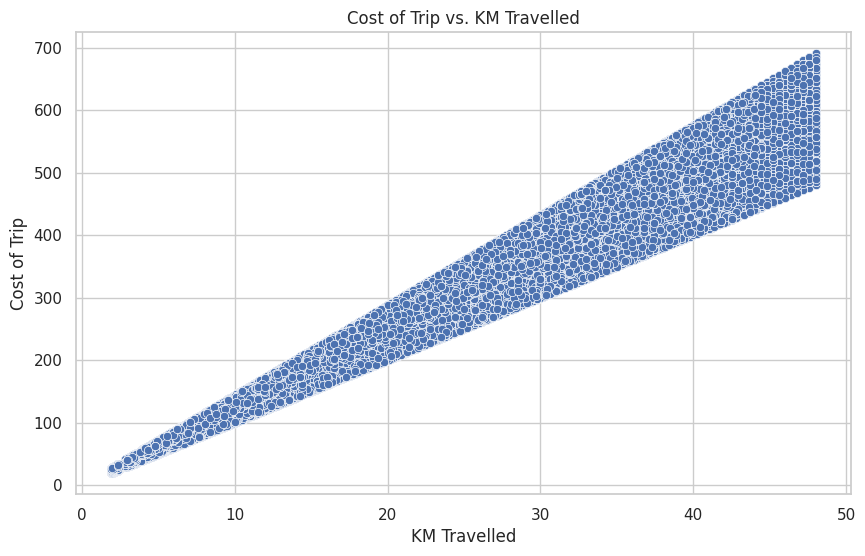

In [179]:
# Scatter plot of cost of trip vs KM travelled
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cab_data, x='KM Travelled', y='Cost of Trip')
plt.title('Cost of Trip vs. KM Travelled')
plt.xlabel('KM Travelled')
plt.ylabel('Cost of Trip')
plt.show()

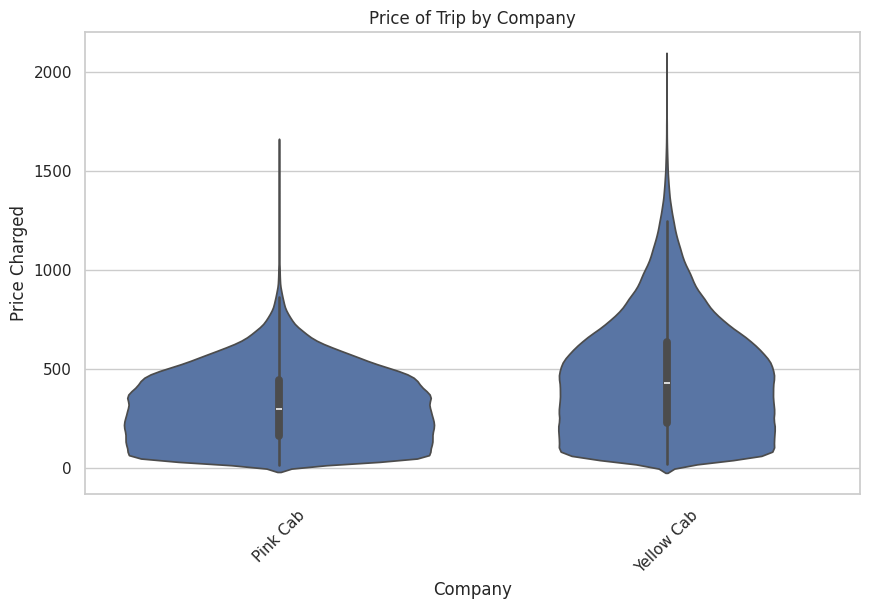

In [180]:
# Violin plot of price charged by company
plt.figure(figsize=(10, 6))
sns.violinplot(data=cab_data, x='Company', y='Price Charged')
plt.title('Price of Trip by Company')
plt.xlabel('Company')
plt.ylabel('Price Charged')
plt.xticks(rotation=45)
plt.show()

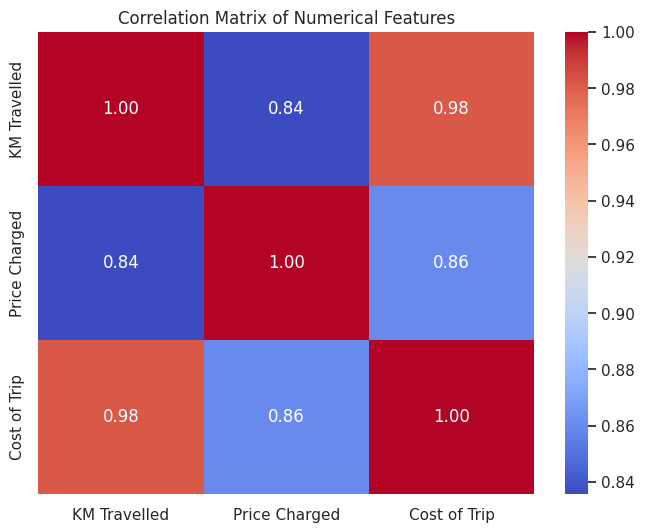

In [181]:
# Correlation matrix of numerical values
numerical_cols = ['KM Travelled', 'Price Charged', 'Cost of Trip']
corr_matrix = cab_data[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


### **Exploratory analysis of City.csv**

In [182]:
city_data.head()

,City Pop.,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [183]:
city_data.tail()

,City Pop.,Population,Users
15,SACRAMENTO CA,"545,776","7,044"
16,PITTSBURGH PA,"542,085","3,643"
17,WASHINGTON DC,"418,859","127,001"
18,NASHVILLE TN,"327,225","9,270"
19,BOSTON MA,"248,968","80,021"


In [184]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City Pop.   20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [185]:
city_data.isnull().sum()

City Pop.     0
Population    0
Users         0
dtype: int64

In [186]:
city_data.describe()

,City Pop.,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


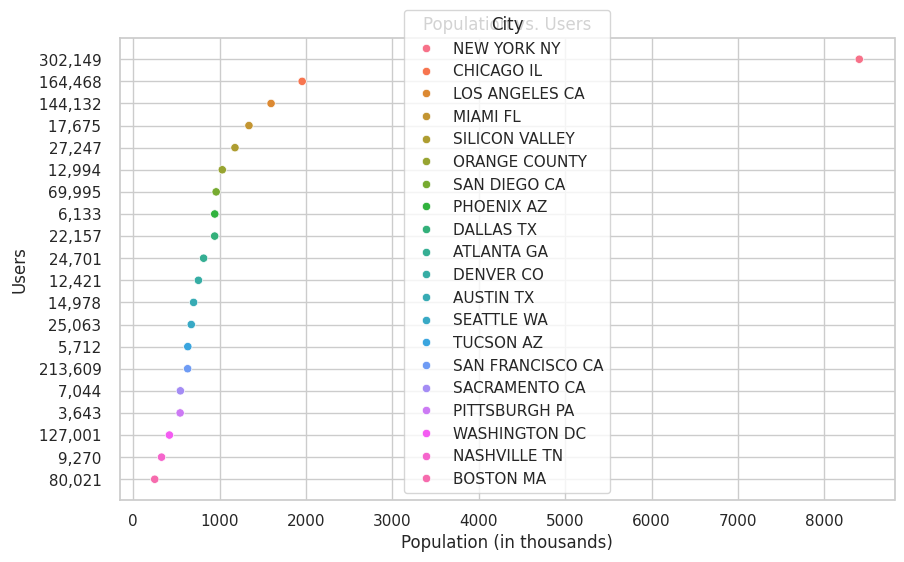

In [192]:
# Population vs Users scatterplot
if city_data['Population'].dtype != 'object':
    city_data['Population'] = city_data['Population'].astype(str)

city_data['Population'] = city_data['Population'].str.replace(',', '')
city_data['Population'] = pd.to_numeric(city_data['Population'], errors='coerce')
missing_population = city_data['Population'].isnull().sum()

city_data['Abbrev_Population'] = city_data['Population'] // 1000
plt.figure(figsize=(10, 6))
sns.scatterplot(data=city_data, x='Abbrev_Population', y='Users', hue='City Pop.', legend='full')
plt.title('Population vs. Users')
plt.xlabel('Population (in thousands)')
plt.ylabel('Users')
plt.legend(title='City')
plt.show()

### **Exploratory analysis of Customer_ID.csv**

In [193]:
customer_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [194]:
customer_data.tail()

,Customer ID,Gender,Age,Income (USD/Month)
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454
49170,39761,Female,32,10128


In [195]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [196]:
customer_data.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [197]:
customer_data.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


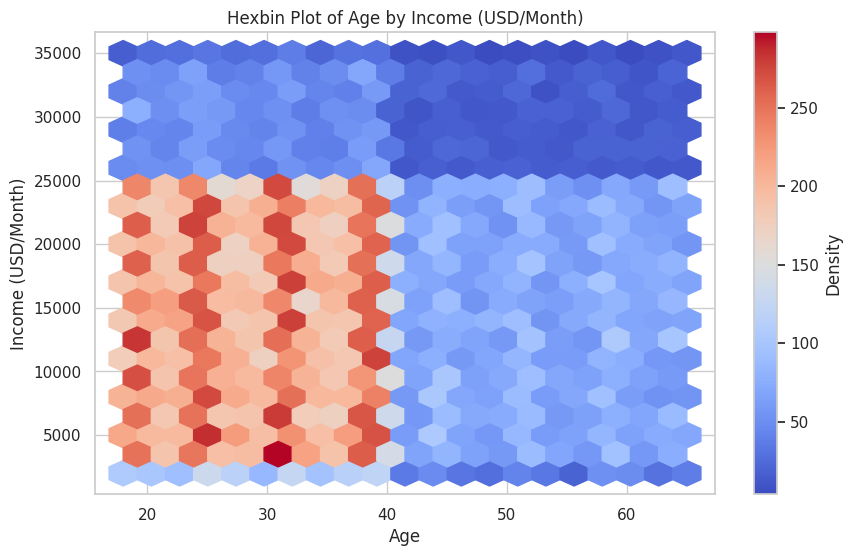

In [198]:
# Hexbin plot for Age by Income (USD/Month)
plt.figure(figsize=(10, 6))
plt.hexbin(customer_data['Age'], customer_data['Income (USD/Month)'], gridsize=20, cmap='coolwarm')
plt.colorbar(label='Density')
plt.title('Hexbin Plot of Age by Income (USD/Month)')
plt.xlabel('Age')
plt.ylabel('Income (USD/Month)')
plt.show()

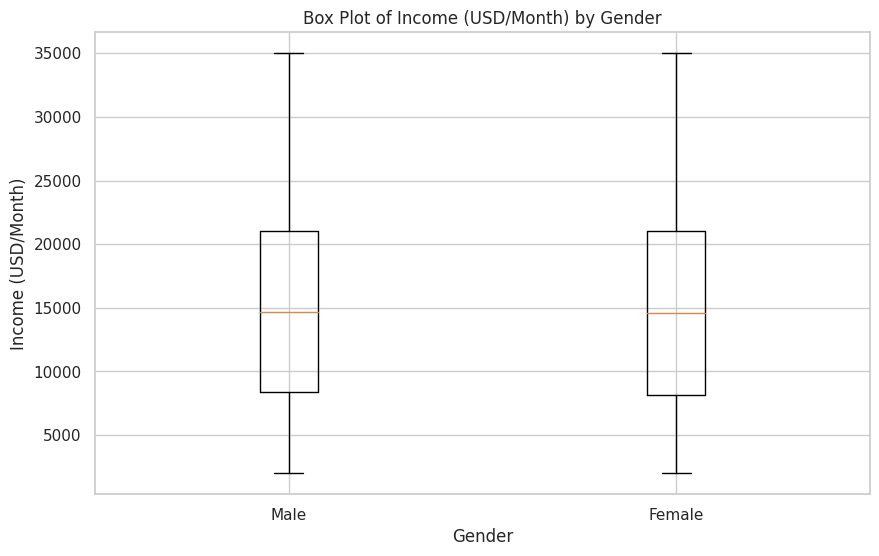

In [199]:
# Box plot for Income (USD/Month) by Gender
plt.figure(figsize=(10, 6))
plt.boxplot([customer_data[customer_data['Gender'] == 'Male']['Income (USD/Month)'],
             customer_data[customer_data['Gender'] == 'Female']['Income (USD/Month)']],
            labels=['Male', 'Female'])
plt.title('Box Plot of Income (USD/Month) by Gender')
plt.xlabel('Gender')
plt.ylabel('Income (USD/Month)')
plt.show()


### **Exploratory analysis of Transaction_ID.csv**

In [200]:
transaction_data.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [201]:
transaction_data.tail()

,Transaction ID,Customer ID,Payment_Mode
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card
440097,10440108,51587,Card


In [202]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [203]:
transaction_data.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

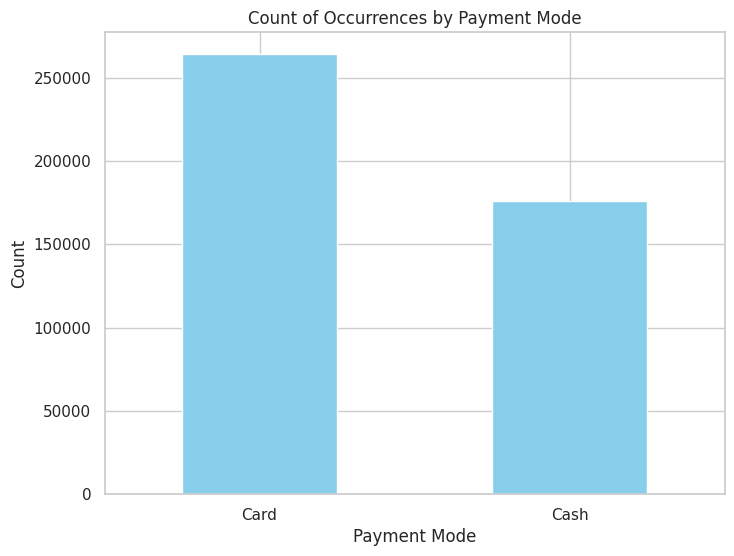

In [204]:
# Bar plot of card vs cash payments
payment_mode_counts = transaction_data['Payment_Mode'].value_counts()
plt.figure(figsize=(8, 6))
payment_mode_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Occurrences by Payment Mode')
plt.xlabel('Payment Mode')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


### **Master_File.csv**

In [ ]:
# Concatenate csv files
master_data = pd.concat([cab_data, customer_data, transaction_data, city_data], axis=1)
master_data.to_csv('Master_file.csv', index=False)

In [ ]:
# Create new feature "Profit/Trip"
master_df = pd.read_csv('Master_file.csv')
master_df['Profit/Trip'] = master_df['Price Charged'] - master_df['Cost of Trip']
master_df.to_csv('Master_file.csv', index=False)

In [ ]:
# Deduplication
key_columns = ['Transaction ID', 'Customer ID']
duplicates = master_df[master_df.duplicated(subset=key_columns, keep='first')]
print("Number of exact duplicates:", len(duplicates))
df_deduped = master_df.drop_duplicates(subset=key_columns, keep='first')
df_deduped.to_csv('deduplicated_file.csv', index=False)

### **Hypothesis 1: Cities with higher populations generate more revenue for cab companies**

In [205]:
city_counts = master_df['City'].value_counts()
print("# OF TRIPS PER CITY")
print("===================================")
print(city_counts)
print("===================================")
profit_per_city = master_df.groupby('City')['Profit'].sum()
print("PROFIT PER CITY")
print("===================================")
profit_per_city_dollars = profit_per_city.apply(lambda x: '${:,.2f}'.format(x))
sorted_profit_per_city = profit_per_city.sort_values(ascending=False)
sorted_profit_per_city_dollars = sorted_profit_per_city.apply(lambda x: '${:,.2f}'.format(x))
print(sorted_profit_per_city_dollars)
print('===================================')
city_data.iloc[:, :-1].head()

# OF TRIPS PER CITY
City
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: count, dtype: int64
PROFIT PER CITY
City
NEW YORK NY       $27,962,555.16
LOS ANGELES CA     $4,411,708.65
WASHINGTON DC      $3,492,870.16
CHICAGO IL         $3,387,313.41
BOSTON MA          $1,768,719.27
SAN DIEGO CA       $1,587,163.47
SILICON VALLEY     $1,316,705.27
DALLAS TX          $1,128,733.27
ATLANTA GA           $842,432.88
MIAMI FL             $758,301.24
SEATTLE WA           $604,684.85
AUSTIN TX            $526,701.03
ORANGE COUNTY        $457,001.87
DENVER CO            $397,585.01
PHOENIX AZ

,City Pop.,Population,Users
0,NEW YORK NY,8405837.0,"302,149"
1,CHICAGO IL,1955130.0,"164,468"
2,LOS ANGELES CA,1595037.0,"144,132"
3,MIAMI FL,1339155.0,"17,675"
4,SILICON VALLEY,1177609.0,"27,247"


The data shows that the cab companies are more profitable in cities with larger populations.

### **Hypothesis 2:** **Company A has more trips in higher population cities than Company B.**

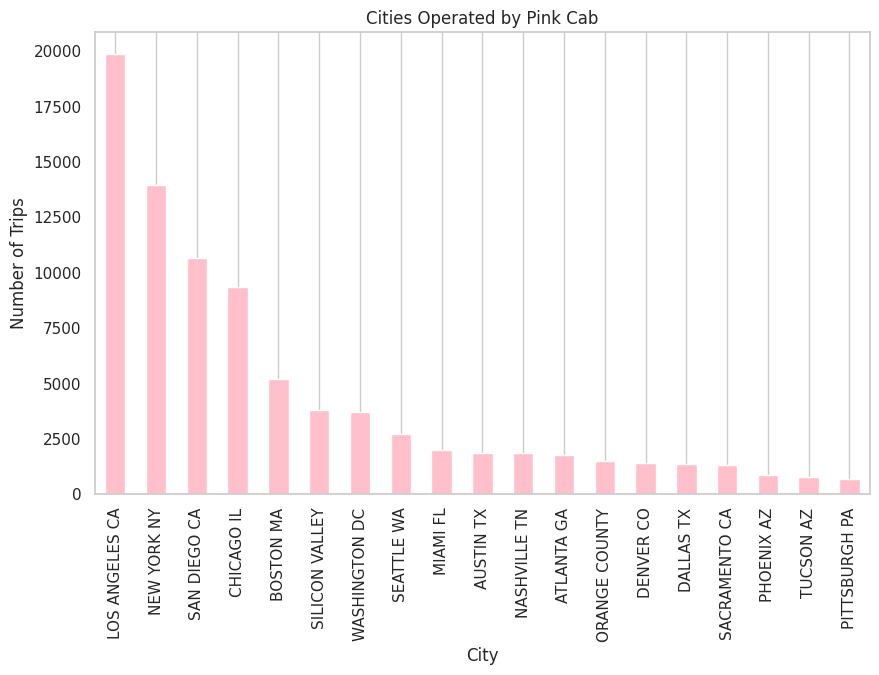

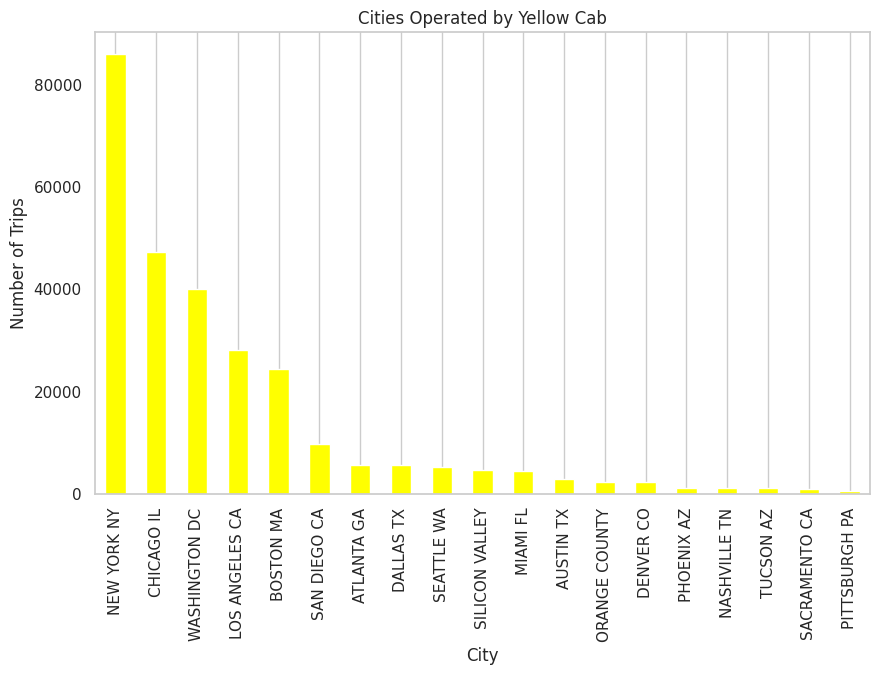

In [206]:
# Filter data for Pink Cab and Yellow Cab
pink_cab_data = master_df[master_df['Company'] == 'Pink Cab']
yellow_cab_data = master_df[master_df['Company'] == 'Yellow Cab']

# Count the occurrences of each city for Pink Cab and Yellow Cab
pink_cab_city_counts = pink_cab_data['City'].value_counts()
yellow_cab_city_counts = yellow_cab_data['City'].value_counts()

# Plotting the bar chart for Pink Cab
plt.figure(figsize=(10, 6))
pink_cab_city_counts.plot(kind='bar', color='pink')
plt.xlabel('City')
plt.ylabel('Number of Trips')
plt.title('Cities Operated by Pink Cab')
plt.grid(axis='y')
plt.show()

# Plotting the bar chart for Yellow Cab
plt.figure(figsize=(10, 6))
yellow_cab_city_counts.plot(kind='bar', color='yellow')
plt.xlabel('City')
plt.ylabel('Number of Trips')
plt.title('Cities Operated by Yellow Cab')
plt.grid(axis='y')
plt.show()


In [207]:
city_data.iloc[:, :-1].head()

,City Pop.,Population,Users
0,NEW YORK NY,8405837.0,"302,149"
1,CHICAGO IL,1955130.0,"164,468"
2,LOS ANGELES CA,1595037.0,"144,132"
3,MIAMI FL,1339155.0,"17,675"
4,SILICON VALLEY,1177609.0,"27,247"


Yellow Cab has more trips in New York and Chicago, the top two most populated cities. Proving Hypothesis 2 to be true.

### **Hypothesis 3:** **Company A has higher average transaction amounts compared to Company B.**

In [208]:
yellow_cab_total = master_df[master_df['Company'] == 'Yellow Cab']['Price Charged'].sum()
pink_cab_total = master_df[master_df['Company'] == 'Pink Cab']['Price Charged'].sum()
print("Total Transaction Amount for Yellow Cab:", yellow_cab_total)
print("Total Transaction Amount for Pink Cab:", pink_cab_total)
if yellow_cab_total > pink_cab_total:
    print("Yellow Cab has higher transaction amounts than Pink Cab.")
elif yellow_cab_total < pink_cab_total:
    print("Pink Cab has higher transaction amounts than Yellow Cab.")
else:
    print("Yellow Cab and Pink Cab have the same total transaction amounts.")

Total Transaction Amount for Yellow Cab: 125853887.18999997
Total Transaction Amount for Pink Cab: 26328251.330000002
Yellow Cab has higher transaction amounts than Pink Cab.


### **Hypothesis 4: Company A has wider margins than Company B**

In [209]:
# Calculate average profit margin for Yellow Cab and Pink Cab
yellow_cab_margin =  master_df[ master_df['Company'] == 'Yellow Cab']['Profit/Trip'].mean()
pink_cab_margin =  master_df[ master_df['Company'] == 'Pink Cab']['Profit/Trip'].mean()
print("Average Profit Margin for Yellow Cab:", yellow_cab_margin)
print("Average Profit Margin for Pink Cab:", pink_cab_margin)
if yellow_cab_margin > pink_cab_margin:
    print("Yellow Cab has wider profit margins than Pink Cab.")
elif yellow_cab_margin < pink_cab_margin:
    print("Pink Cab has wider profit margins than Yellow Cab.")
else:
    print("Yellow Cab and Pink Cab have the same average profit margins.")


Average Profit Margin for Yellow Cab: 160.25998584103016
Average Profit Margin for Pink Cab: 62.65217410961977
Yellow Cab has wider profit margins than Pink Cab.


### **Hypothesis 5: Revenue Per Kilometer**

  Null Hypothesis (H0): There is no significant difference in revenue per kilometer between "Yellow Cab" and "Pink Cab."

  Alternative Hypothesis (H1): "Yellow Cab" generates higher revenue per kilometer compared to "Pink Cab."

In [210]:
yellow_cab_data = master_df[master_df['Company'] == 'Yellow Cab'].copy()
pink_cab_data = master_df[master_df['Company'] == 'Pink Cab'].copy()
yellow_cab_data.loc[:, 'Revenue Per KM'] = yellow_cab_data['Price Charged'] / yellow_cab_data['KM Travelled']
pink_cab_data.loc[:, 'Revenue Per KM'] = pink_cab_data['Price Charged'] / pink_cab_data['KM Travelled']
t_stat, p_value = ttest_ind(yellow_cab_data['Revenue Per KM'], pink_cab_data['Revenue Per KM'], alternative='greater')
if p_value < 0.05:
    print("Reject Null Hypothesis: Yellow Cab generates higher revenue per kilometer than Pink Cab.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference in revenue per kilometer.")


Reject Null Hypothesis: Yellow Cab generates higher revenue per kilometer than Pink Cab.


# After performing EDA of the datasets provided I recommend pursuing investments into "Yellow Cab". The five hypothesis tested show that "Yellow Cab" generates more revenue than "Pink Cab". "Yellow Cab" also has control over more of the market than "Pink Cab" does, due to their higher prevelance in more populated cities.  